## Linear Regression to Predict House Prices
### Rahil Patel

In this project I used Melbourne housing dataset to build a linear regression model, and use that model to estimate price of properties. 

In [114]:
# load the libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

## Load in the data file here
url = 'https://gist.githubusercontent.com/TieJean/797fc6b68b98dc93d9270c1d9b5759d5/raw/a2d467663d9320913ca4b3c52aa75bb20e42988e/melb_data_sold_train.csv/' 
df = pd.read_csv(url)
df


,Suburb,Address,Rooms,Type,Price,Date,Postcode,Bedroom2,Bathroom,Car,Landsize,BuildingArea,YearBuilt,CouncilArea,Lattitude,Longtitude,Regionname
0,Abbotsford,85 Turner St,2,h,1480000.0,3/12/2016,3067.0,2.0,1.0,1.0,202.0,NaN,NaN,Yarra,-37.79960,144.99840,Northern Metropolitan
1,Abbotsford,25 Bloomburg St,2,h,1035000.0,4/02/2016,3067.0,2.0,1.0,0.0,156.0,79.0,1900.0,Yarra,-37.80790,144.99340,Northern Metropolitan
2,Abbotsford,129 Charles St,2,h,941000.0,7/05/2016,3067.0,2.0,1.0,0.0,181.0,NaN,NaN,Yarra,-37.80410,144.99530,Northern Metropolitan
3,Abbotsford,124 Yarra St,3,h,1876000.0,7/05/2016,3067.0,4.0,2.0,0.0,245.0,210.0,1910.0,Yarra,-37.80240,144.99930,Northern Metropolitan
4,Abbotsford,98 Charles St,2,h,1636000.0,8/10/2016,3067.0,2.0,1.0,2.0,256.0,107.0,1890.0,Yarra,-37.80600,144.99540,Northern Metropolitan
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7995,Highett,1/12 Jillian Av,3,t,1200000.0,29/07/2017,3190.0,3.0,1.0,2.0,269.0,125.0,2000.0,Bayside,-37.94775,145.02379,Southern Metropolitan
7996,Highett,23 The Crescent,3,h,1260000.0,29/07/2017,3190.0,3.0,1.0,0.0,642.0,NaN,NaN,Kingston,-37.94691,145.04935,Southern Metropolitan
7997,Highett,31 The Crescent,4,t,1200000.0,29/07/2017,3190.0,4.0,2.0,2.0,304.0,183.0,2007.0,Kingston,-37.94633,145.04947,Southern Metropolitan
7998,Hillside,1/14 Jade Wy,3,u,485000.0,29/07/2017,3037.0,3.0,2.0,2.0,345.0,NaN,2005.0,Melton,-37.70428,144.74705,Western Metropolitan


### Fix the dataset to remove any blanks


In [115]:
df1 = df.dropna(axis=0,how='any')
df1 = df1.reset_index(drop=True)
df1

,Suburb,Address,Rooms,Type,Price,Date,Postcode,Bedroom2,Bathroom,Car,Landsize,BuildingArea,YearBuilt,CouncilArea,Lattitude,Longtitude,Regionname
0,Abbotsford,25 Bloomburg St,2,h,1035000.0,4/02/2016,3067.0,2.0,1.0,0.0,156.0,79.0,1900.0,Yarra,-37.80790,144.99340,Northern Metropolitan
1,Abbotsford,124 Yarra St,3,h,1876000.0,7/05/2016,3067.0,4.0,2.0,0.0,245.0,210.0,1910.0,Yarra,-37.80240,144.99930,Northern Metropolitan
2,Abbotsford,98 Charles St,2,h,1636000.0,8/10/2016,3067.0,2.0,1.0,2.0,256.0,107.0,1890.0,Yarra,-37.80600,144.99540,Northern Metropolitan
3,Abbotsford,10 Valiant St,2,h,1097000.0,8/10/2016,3067.0,3.0,1.0,2.0,220.0,75.0,1900.0,Yarra,-37.80100,144.99890,Northern Metropolitan
4,Abbotsford,123/56 Nicholson St,2,u,750000.0,12/11/2016,3067.0,2.0,2.0,1.0,0.0,94.0,2009.0,Yarra,-37.80780,144.99650,Northern Metropolitan
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3905,Glenroy,69 Melbourne Av,3,h,680000.0,29/07/2017,3046.0,3.0,1.0,1.0,422.0,104.0,1960.0,Moreland,-37.70425,144.93164,Northern Metropolitan
3906,Greensborough,12 Yangoora Pl,4,h,900000.0,29/07/2017,3088.0,4.0,3.0,1.0,807.0,190.0,1975.0,Banyule,-37.70077,145.12743,Northern Metropolitan
3907,Highett,1/12 Jillian Av,3,t,1200000.0,29/07/2017,3190.0,3.0,1.0,2.0,269.0,125.0,2000.0,Bayside,-37.94775,145.02379,Southern Metropolitan
3908,Highett,31 The Crescent,4,t,1200000.0,29/07/2017,3190.0,4.0,2.0,2.0,304.0,183.0,2007.0,Kingston,-37.94633,145.04947,Southern Metropolitan


Create a new column in dataset that is the distance in kilometers from the center of Toorak to the latitude/longitude of that row. Center of Toorak: latitude / longitude of $(-37.841820, 145.015986)$.

In [116]:
# Haversine distance function

r = 6371.0088
def haversine_distance(pt2):
    pt1 = np.array([-37.841820, 145.015986])
    lat_1 = np.radians(pt1[0])
    long_1 =np.radians(pt1[1])
    lat_2 = np.radians(pt2[0])
    long_2 = np.radians([pt2[1]])

    inside = (np.sin( (lat_2 - lat_1)/2 ))**2 + np.cos(lat_1) * np.cos(lat_2) * (np.sin( (long_2 - long_1)/2 ))**2
  
    d = 2 * r * np.arcsin(np.sqrt(inside))
    return d[0]
    

In [117]:
# A quick check 
toorak_pt = np.array([-37.841820, 145.015986])
haversine_distance([-37.68178,144.73779])


30.244772513569124

In [118]:
# Add a new column 'distance_to_toorak' 
df2 = df1
df2['distance_to_toorak'] = df1[["Lattitude", 'Longtitude']].apply(haversine_distance, axis = 1)
df2

C:\Users\rahil\AppData\Local\Temp\ipykernel_11832\2421248865.py:8: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  lat_2 = np.radians(pt2[0])
C:\Users\rahil\AppData\Local\Temp\ipykernel_11832\2421248865.py:9: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  long_2 = np.radians([pt2[1]])


,Suburb,Address,Rooms,Type,Price,Date,Postcode,Bedroom2,Bathroom,Car,Landsize,BuildingArea,YearBuilt,CouncilArea,Lattitude,Longtitude,Regionname,distance_to_toorak
0,Abbotsford,25 Bloomburg St,2,h,1035000.0,4/02/2016,3067.0,2.0,1.0,0.0,156.0,79.0,1900.0,Yarra,-37.80790,144.99340,Northern Metropolitan,4.261612
1,Abbotsford,124 Yarra St,3,h,1876000.0,7/05/2016,3067.0,4.0,2.0,0.0,245.0,210.0,1910.0,Yarra,-37.80240,144.99930,Northern Metropolitan,4.621843
2,Abbotsford,98 Charles St,2,h,1636000.0,8/10/2016,3067.0,2.0,1.0,2.0,256.0,107.0,1890.0,Yarra,-37.80600,144.99540,Northern Metropolitan,4.374206
3,Abbotsford,10 Valiant St,2,h,1097000.0,8/10/2016,3067.0,3.0,1.0,2.0,220.0,75.0,1900.0,Yarra,-37.80100,144.99890,Northern Metropolitan,4.780655
4,Abbotsford,123/56 Nicholson St,2,u,750000.0,12/11/2016,3067.0,2.0,2.0,1.0,0.0,94.0,2009.0,Yarra,-37.80780,144.99650,Northern Metropolitan,4.152012
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3905,Glenroy,69 Melbourne Av,3,h,680000.0,29/07/2017,3046.0,3.0,1.0,1.0,422.0,104.0,1960.0,Moreland,-37.70425,144.93164,Northern Metropolitan,16.998846
3906,Greensborough,12 Yangoora Pl,4,h,900000.0,29/07/2017,3088.0,4.0,3.0,1.0,807.0,190.0,1975.0,Banyule,-37.70077,145.12743,Northern Metropolitan,18.491623
3907,Highett,1/12 Jillian Av,3,t,1200000.0,29/07/2017,3190.0,3.0,1.0,2.0,269.0,125.0,2000.0,Bayside,-37.94775,145.02379,Southern Metropolitan,11.798784
3908,Highett,31 The Crescent,4,t,1200000.0,29/07/2017,3190.0,4.0,2.0,2.0,304.0,183.0,2007.0,Kingston,-37.94633,145.04947,Southern Metropolitan,11.986684


### One hot encoding for the categorical column 'Type'
* Turning categorical columnes into numerical columns for Linear Regression model

In [119]:
type_dummies = pd.get_dummies(df2['Type'], prefix = 'Type')
removed = df2.drop(columns = ["Type"])
df3 = pd.concat([type_dummies, removed], axis = 1)
df3 

,Type_h,Type_t,Type_u,Suburb,Address,Rooms,Price,Date,Postcode,Bedroom2,Bathroom,Car,Landsize,BuildingArea,YearBuilt,CouncilArea,Lattitude,Longtitude,Regionname,distance_to_toorak
0,True,False,False,Abbotsford,25 Bloomburg St,2,1035000.0,4/02/2016,3067.0,2.0,1.0,0.0,156.0,79.0,1900.0,Yarra,-37.80790,144.99340,Northern Metropolitan,4.261612
1,True,False,False,Abbotsford,124 Yarra St,3,1876000.0,7/05/2016,3067.0,4.0,2.0,0.0,245.0,210.0,1910.0,Yarra,-37.80240,144.99930,Northern Metropolitan,4.621843
2,True,False,False,Abbotsford,98 Charles St,2,1636000.0,8/10/2016,3067.0,2.0,1.0,2.0,256.0,107.0,1890.0,Yarra,-37.80600,144.99540,Northern Metropolitan,4.374206
3,True,False,False,Abbotsford,10 Valiant St,2,1097000.0,8/10/2016,3067.0,3.0,1.0,2.0,220.0,75.0,1900.0,Yarra,-37.80100,144.99890,Northern Metropolitan,4.780655
4,False,False,True,Abbotsford,123/56 Nicholson St,2,750000.0,12/11/2016,3067.0,2.0,2.0,1.0,0.0,94.0,2009.0,Yarra,-37.80780,144.99650,Northern Metropolitan,4.152012
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3905,True,False,False,Glenroy,69 Melbourne Av,3,680000.0,29/07/2017,3046.0,3.0,1.0,1.0,422.0,104.0,1960.0,Moreland,-37.70425,144.93164,Northern Metropolitan,16.998846
3906,True,False,False,Greensborough,12 Yangoora Pl,4,900000.0,29/07/2017,3088.0,4.0,3.0,1.0,807.0,190.0,1975.0,Banyule,-37.70077,145.12743,Northern Metropolitan,18.491623
3907,False,True,False,Highett,1/12 Jillian Av,3,1200000.0,29/07/2017,3190.0,3.0,1.0,2.0,269.0,125.0,2000.0,Bayside,-37.94775,145.02379,Southern Metropolitan,11.798784
3908,False,True,False,Highett,31 The Crescent,4,1200000.0,29/07/2017,3190.0,4.0,2.0,2.0,304.0,183.0,2007.0,Kingston,-37.94633,145.04947,Southern Metropolitan,11.986684


### Correlation

In [120]:
df3.corr('pearson', numeric_only= True)

,Type_h,Type_t,Type_u,Rooms,Price,Postcode,Bedroom2,Bathroom,Car,Landsize,BuildingArea,YearBuilt,Lattitude,Longtitude,distance_to_toorak
Type_h,1.000000,-0.484749,-0.778062,0.501128,0.391761,-0.040504,0.484612,0.181773,0.214175,0.047422,0.306231,-0.402670,0.121254,-0.040387,0.221104
Type_t,-0.484749,1.000000,-0.172282,-0.040762,-0.095295,-0.008546,-0.037366,0.108148,-0.006836,-0.067257,-0.032396,0.331105,-0.028636,0.023603,-0.014192
Type_u,-0.778062,-0.172282,1.000000,-0.535102,-0.372766,0.051754,-0.518941,-0.282390,-0.236298,-0.005103,-0.321614,0.215689,-0.115991,0.028533,-0.238818
Rooms,0.501128,-0.040762,-0.535102,1.000000,0.502814,0.054676,0.941684,0.593847,0.401716,0.085676,0.547816,-0.030447,0.012858,0.074846,0.232844
Price,0.391761,-0.095295,-0.372766,0.502814,1.000000,0.136468,0.480115,0.462985,0.223552,0.064029,0.465598,-0.330560,-0.224400,0.184597,-0.357013
Postcode,-0.040504,-0.008546,0.051754,0.054676,0.136468,1.000000,0.059311,0.122046,0.034698,0.014276,0.089355,0.035561,-0.445625,0.471934,0.008062
Bedroom2,0.484612,-0.037366,-0.518941,0.941684,0.480115,0.059311,1.000000,0.594920,0.403840,0.083237,0.532910,-0.010031,0.019970,0.076236,0.241515
Bathroom,0.181773,0.108148,-0.282390,0.593847,0.462985,0.122046,0.594920,1.000000,0.322266,0.059483,0.470554,0.192470,-0.068643,0.109313,0.051662
Car,0.214175,-0.006836,-0.236298,0.401716,0.223552,0.034698,0.403840,0.322266,1.000000,0.100686,0.299613,0.153313,-0.007839,0.032915,0.214759
Landsize,0.047422,-0.067257,-0.005103,0.085676,0.064029,0.014276,0.083237,0.059483,0.100686,1.000000,0.063136,0.028638,0.010734,0.013979,0.041420


### Linear regression model to predict home prices

In [121]:
# build matrix X
X = df3.select_dtypes(np.number)
X['intercept'] = np.ones(3910)
X = X.drop( columns='Price')
X

,Rooms,Postcode,Bedroom2,Bathroom,Car,Landsize,BuildingArea,YearBuilt,Lattitude,Longtitude,distance_to_toorak,intercept
0,2,3067.0,2.0,1.0,0.0,156.0,79.0,1900.0,-37.80790,144.99340,4.261612,1.0
1,3,3067.0,4.0,2.0,0.0,245.0,210.0,1910.0,-37.80240,144.99930,4.621843,1.0
2,2,3067.0,2.0,1.0,2.0,256.0,107.0,1890.0,-37.80600,144.99540,4.374206,1.0
3,2,3067.0,3.0,1.0,2.0,220.0,75.0,1900.0,-37.80100,144.99890,4.780655,1.0
4,2,3067.0,2.0,2.0,1.0,0.0,94.0,2009.0,-37.80780,144.99650,4.152012,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...
3905,3,3046.0,3.0,1.0,1.0,422.0,104.0,1960.0,-37.70425,144.93164,16.998846,1.0
3906,4,3088.0,4.0,3.0,1.0,807.0,190.0,1975.0,-37.70077,145.12743,18.491623,1.0
3907,3,3190.0,3.0,1.0,2.0,269.0,125.0,2000.0,-37.94775,145.02379,11.798784,1.0
3908,4,3190.0,4.0,2.0,2.0,304.0,183.0,2007.0,-37.94633,145.04947,11.986684,1.0


In [122]:
# build column vector y
y = df3['Price']
y

0       1035000.0
1       1876000.0
2       1636000.0
3       1097000.0
4        750000.0
          ...    
3905     680000.0
3906     900000.0
3907    1200000.0
3908    1200000.0
3909     618350.0
Name: Price, Length: 3910, dtype: float64

In [123]:
# beta hat
beta_hat, residuals, rank, s = np.linalg.lstsq(X,y,rcond= None)
beta_hat.reshape(12,1)

array([[ 1.80849726e+05],
       [ 5.38885670e+02],
       [ 4.33001331e+04],
       [ 2.06429188e+05],
       [ 6.34003796e+04],
       [ 1.76807806e+01],
       [ 1.34689029e+03],
       [-4.72750051e+03],
       [-4.95810084e+05],
       [-1.49098684e+05],
       [-3.83628616e+04],
       [ 1.07214209e+07]])

In [124]:
# Test a value on the model
np.matmul(X.iloc[23],beta_hat) 

636019.3529958352

In [125]:
# actual price of data entry 23
y[23]

805000.0

### Apply the linear regression model to the test data 

In [127]:
# load in the data
test = pd.read_csv("https://gist.githubusercontent.com/TieJean/e17178b1ffcb594dbf2232de90f8bb1f/raw/17c751b38a159b246321100188f35fa7cfb6c0b9/melb_data_sold_test.csv")


new_df = test.drop(columns=['Suburb', 'Address', 'Date', 'CouncilArea', 'Regionname'])
car_mean = new_df["Car"].mean()
bldngArea_mean = new_df["BuildingArea"].mean()
yrBuilt_mean = new_df["YearBuilt"].mean()

# imputation for missing data
new_df["Car"] = new_df["Car"].fillna(car_mean)
new_df["BuildingArea"] = new_df["BuildingArea"].fillna(bldngArea_mean)
new_df["YearBuilt"] = new_df["YearBuilt"].fillna(yrBuilt_mean)
new_df1 = new_df


In [128]:
# add the new column 'distance_to_toorak' and the one hot encoding to the new data frame
new_df1['distance_to_toorak'] = new_df[["Lattitude", 'Longtitude']].apply(haversine_distance, axis = 1)
new_df1

type_dummies = pd.get_dummies(new_df1['Type'], prefix = 'Type')
removed = new_df1.drop(columns = ["Type"])
new_df2 = pd.concat([type_dummies, removed], axis = 1)
new_df2 

C:\Users\rahil\AppData\Local\Temp\ipykernel_11832\2421248865.py:8: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  lat_2 = np.radians(pt2[0])
C:\Users\rahil\AppData\Local\Temp\ipykernel_11832\2421248865.py:9: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  long_2 = np.radians([pt2[1]])


,Type_h,Type_t,Type_u,Rooms,Price,Postcode,Bedroom2,Bathroom,Car,Landsize,BuildingArea,YearBuilt,Lattitude,Longtitude,distance_to_toorak
0,True,False,False,3,620500.0,3047.0,3.0,1.0,4.0,764.0,244.154731,1968.796396,-37.68907,144.91459,19.181567
1,True,False,False,3,750000.0,3042.0,3.0,2.0,2.0,761.0,222.000000,1980.000000,-37.72224,144.85739,19.263068
2,True,False,False,3,1060000.0,3031.0,3.0,1.0,0.0,190.0,244.154731,1968.796396,-37.79560,144.92779,9.296810
3,False,True,False,3,1405000.0,3101.0,3.0,2.0,2.0,325.0,129.000000,1980.000000,-37.81614,145.05056,4.168250
4,True,False,False,4,3015000.0,3101.0,4.0,2.0,2.0,813.0,276.000000,1970.000000,-37.80437,145.01725,4.165735
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1016,True,False,False,4,1330000.0,3152.0,4.0,2.0,2.0,717.0,191.000000,1980.000000,-37.86887,145.22116,18.262739
1017,True,False,False,4,635000.0,3030.0,4.0,2.0,1.0,662.0,172.000000,1980.000000,-37.89327,144.64789,32.814349
1018,True,False,False,3,582000.0,3049.0,3.0,2.0,2.0,256.0,244.154731,1968.796396,-37.67917,144.89390,21.030518
1019,True,False,False,4,1245000.0,3150.0,4.0,2.0,2.0,652.0,244.154731,1981.000000,-37.90562,145.16761,15.081333


In [129]:
# build attribute matrix
actual_price = new_df2["Price"]
Xdot = new_df2.drop(columns = "Price")
Xdot['intercept'] = np.ones(1021)
Xdot = Xdot.select_dtypes(np.number)                                                                                   

In [130]:
# multiply Xdot by Beta hat
y_hat = np.matmul(Xdot, beta_hat)
y_hat

0       8.749441e+05
1       8.908679e+05
2       1.032630e+06
3       1.386528e+06
4       1.863801e+06
            ...     
1016    1.188602e+06
1017    5.722245e+05
1018    8.739138e+05
1019    1.401494e+06
1020    1.310901e+06
Length: 1021, dtype: float64

In [131]:
# calculate the error vector, absolute error = |actual price - predicted price|
absolute_error = abs(y - y_hat)
absolute_error

0       1.600559e+05
1       9.851321e+05
2       6.033702e+05
3       2.895281e+05
4       1.113801e+06
            ...     
3905             NaN
3906             NaN
3907             NaN
3908             NaN
3909             NaN
Length: 3910, dtype: float64


### Visualize the error

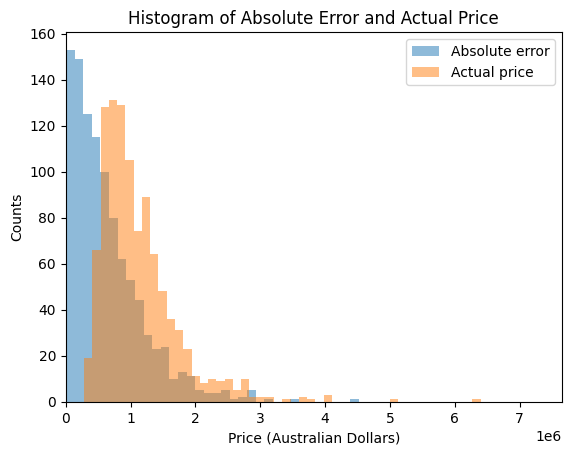

In [132]:
# histogram of the absolute error, and histogram of the actual price.  
plt.hist(absolute_error, bins = 'auto', alpha = 1/2, label = "Absolute error")
plt.hist(actual_price, bins = 'auto',alpha = 1/2, label = "Actual price")
plt.xlabel("Price (Australian Dollars)")
plt.ylabel("Counts")
plt.title("Histogram of Absolute Error and Actual Price")
plt.xlim(0,max(y))
plt.legend()